# Data science homework 2

## 資工二 110590038 呂凱達

In [2]:
from string import Template
import pandas as pd
import requests

In [3]:
# only keep the first 3 decimal places
pd.set_option('display.precision', 3)

In [4]:
# get stock data from TWSE
# provide you with a different way to format string
url = Template('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=$date&type=ALLBUT0999')
response = requests.get(url.substitute(date='20230321'))

In [5]:
assert response.ok

In [6]:
stocks = pd.DataFrame(
response.json()['data9'],
columns=response.json()['fields9'],
)
stocks

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,0050,元大台灣50,"3,732,049","5,260","442,410,377",118.50,118.75,118.20,118.65,<p style= color:red>+</p>,0.55,118.60,59,118.65,53,0.00
1,0051,元大中型100,"32,859",158,"1,844,752",56.00,56.30,56.00,56.15,<p style= color:red>+</p>,0.55,56.10,16,56.15,1,0.00
2,0052,富邦科技,"159,881",211,"16,946,680",106.20,106.25,105.85,106.20,<p style= color:red>+</p>,0.55,106.20,23,106.25,5,0.00
3,0053,元大電子,"3,980",912,"234,403",59.25,59.25,59.00,59.20,<p style= color:red>+</p>,0.25,59.05,14,59.35,2,0.00
4,0055,元大MSCI金融,"251,918",275,"5,415,931",21.44,21.60,21.38,21.46,<p style= color:red>+</p>,0.20,21.45,10,21.47,4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,9944,新麗,"121,772",112,"2,471,669",20.30,20.35,20.25,20.35,<p style= color:green>-</p>,0.05,20.30,2,20.35,10,4.18
1183,9945,潤泰新,"21,436,400","10,660","758,382,285",34.60,36.00,34.50,35.65,<p style= color:red>+</p>,1.35,35.60,96,35.65,153,12.29
1184,9946,三發地產,"107,844",87,"1,280,802",11.95,11.95,11.80,11.90,<p> </p>,0.00,11.90,2,11.95,28,27.67
1185,9955,佳龍,"8,680,623","5,015","226,719,392",25.15,26.95,24.80,26.65,<p style= color:red>+</p>,1.15,26.60,10,26.65,19,0.00


In [7]:
features = ['開盤價', '收盤價'] # target features
stocks = stocks[features].copy() # copy() to avoid SettingWithCopyWarning

In [8]:
def is_float_convertible(value: str) -> bool:
    try:
        value = float(value)
    except:
        return False
    return True


assert stocks.applymap(is_float_convertible).all(axis=None)

AssertionError: 

In [9]:
def display_float_unconvertible_values(data: pd.DataFrame) -> None:
    """Display the values that are not able to convert to float."""
    problem_values = set()
    for _, values in data.select_dtypes(exclude='number').items():
        problem_values.update(
            values[~values.apply(is_float_convertible)].unique())
        
    print(f'{problem_values=}')

display_float_unconvertible_values(stocks)

problem_values={'1,105.00', '1,250.00', '1,275.00', '2,280.00', '1,125.00', '1,290.00', '--', '1,190.00', '1,635.00', '1,170.00', '1,150.00', '2,255.00', '1,685.00'}


In [10]:
# fix values not able to convert to float
# TODO: handle '--'

check = []

for i in stocks.index:
    if stocks.開盤價[i] != '--':
        check.append(i)

stocks = stocks.loc[check].copy()


# TODO: handle thousands separators
# ...

for i in stocks.index:
    stocks.開盤價[i] = stocks.開盤價[i].replace(',', '')
    stocks.收盤價[i] = stocks.收盤價[i].replace(',', '')


In [11]:
stocks.開盤價 = pd.to_numeric(stocks.開盤價)
stocks.收盤價 = pd.to_numeric(stocks.收盤價)

In [12]:
stocks[features].describe().loc[['mean', 'std']]

,開盤價,收盤價
mean,66.519,66.400
std,137.063,135.987







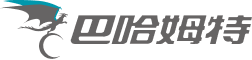
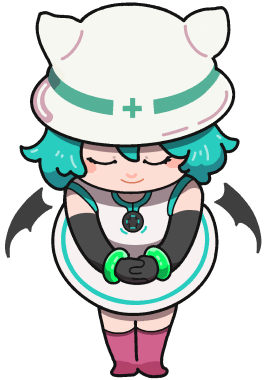

In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://forum.gamer.com.tw/C.php?bsn=45439&snA=1498&tnum=1'
response = requests.get(url)
content = response.content

soup = BeautifulSoup(content, "html.parser")

for img_tag in soup.find_all("img"):
    print(img_tag)